
# Exploratory Data Analysis & Intro

   ## Goal

        1.Investigate top-paying roles and skills in the data science industry.
        2.Use Python to explore a real-live dataset on job postings.
        3.For job-seekers: use these insights to help find the best job opportunities.



   ## Questions to Answer

        1.What are the most demanded skills for the top 3 most popular data roles?
        2.How are in-demand skills trending for Data Analysts?
        3.How well do jobs and skills pay for Data Analysts?
        4.What is the most optimal skill to learn for Data Analysts? (High Demand AND High Paying)




In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast
import seaborn as sns

# Load Data
df = pd.read_csv("C:\\Users\\ERKAN\\Downloads\\data_jobs.csv")

# Data Cleanup
df["job_posted_date"] = pd.to_datetime(df.job_posted_date)
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# ROLES TO EXPLORE 

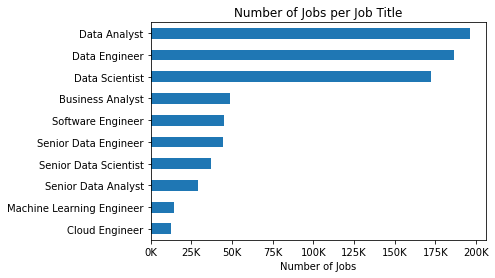

In [2]:
df_plot = df.job_title_short.value_counts()
df_plot[::-1].plot(kind="barh")

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"{int(x/1000)}K"))

plt.title("Number of Jobs per Job Title")
plt.xlabel("Number of Jobs")
plt.ylabel("")
plt.show()

# COUNTRIES TO EXPLORE 

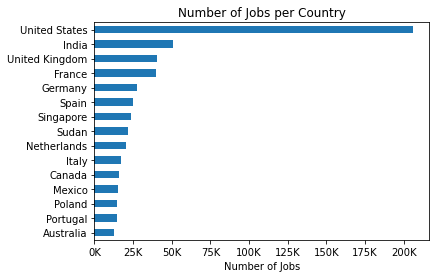

In [3]:
df_plot = df.job_country.value_counts().head(15)
df_plot[::-1].plot(kind="barh")

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"{int(x/1000)}K"))

plt.title("Number of Jobs per Country")
plt.xlabel("Number of Jobs")
plt.ylabel("")
plt.show()

# COMPANIES TO EXPLORE 

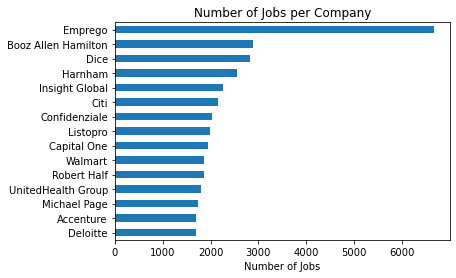

In [4]:
df_plot = df.company_name.value_counts().head(15)
df_plot[::-1].plot(kind="barh")


plt.title("Number of Jobs per Company")
plt.xlabel("Number of Jobs")
plt.ylabel("")
plt.show()

# LOCATIONS TO EXPLORE 

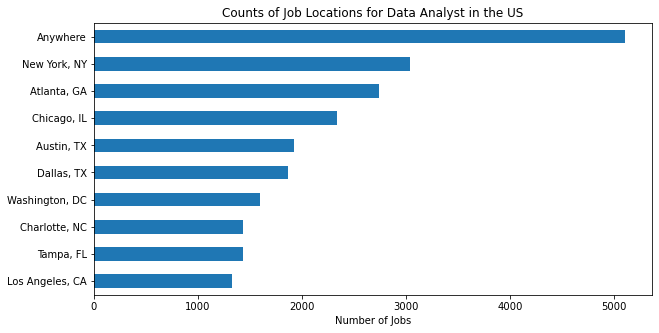

In [5]:
df_DA_US = df[(df.job_country == "United States") & (df.job_title_short == "Data Analyst")].copy()

df_DA_US_plotter = df_DA_US.job_location.value_counts().head(10)
df_DA_US_plotter.iloc[::-1].plot(kind="barh", figsize=(10,5))

plt.title("Counts of Job Locations for Data Analyst in the US")
plt.xlabel("Number of Jobs")
plt.ylabel("")
plt.show()

#Anywhere means remote

##  JOB OPPORTUNITIES 

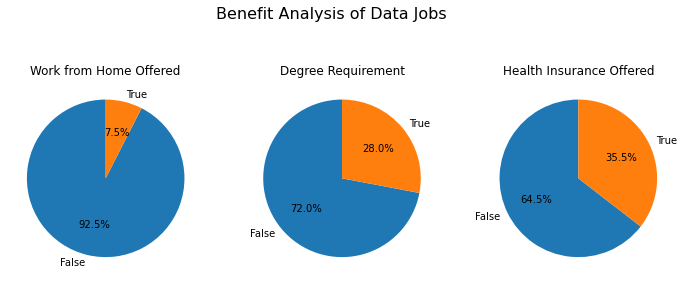

In [6]:

dict_column = {
    "job_work_from_home": "Work from Home Offered",
    "job_no_degree_mention": "Degree Requirement",
    "job_health_insurance": "Health Insurance Offered"
}

fig, ax = plt.subplots(1, 3, facecolor="white")
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(), labels=["False", "True"], autopct="%.1f%%", startangle=90)
    ax[i].set_title(title)

plt.suptitle("Benefit Analysis of Data Jobs", fontsize=16)
plt.show()




## COMPANIES FOR DATA ANALYSIS 

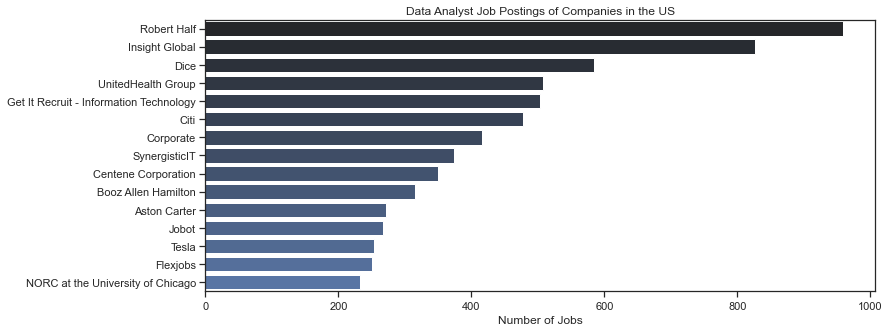

In [25]:
df_DA_US_plotter = df_DA_US.company_name.value_counts().head(15)

plt.figure(figsize=(12, 5))
sns.set_theme(style="ticks")
bars = sns.barplot(x=df_DA_US_plotter.values, y=df_DA_US_plotter.index, hue=df_DA_US_plotter.values, ci=None, dodge=False, palette="dark:b_r")


plt.title("Data Analyst Job Postings of Companies in the US", pad=5)
plt.xlabel("Number of Jobs")
plt.ylabel("")
bars.get_legend().set_visible(False)
plt.show()